### **1.0  INSTALACION**

In [1]:
# !pip install milcapy

### **PRACTICA CON UN MODELO DE UN PORTICO 2 AGUAS**

In [3]:
from milcapy import (
    SystemModel,
    model_viewer,
    BeamTheoriesType
)

In [4]:
model = SystemModel()

model.add_material(name="concreto", modulus_elasticity=2.1e6, poisson_ratio=0.2)
model.add_rectangular_section(name="vigas", material_name="concreto", base=0.3, height=0.5)
model.add_rectangular_section(name="muros", material_name="concreto", base=0.3, height=2.0)

In [5]:
model.add_node(1, 0, 0)
model.add_node(2, 0, 5)
model.add_node(3, 7, 8.5)
model.add_node(4, 14, 5)
model.add_node(5, 14, 0)

In [6]:
model.add_member(1, 1, 2, "muros", BeamTheoriesType.TIMOSHENKO)
model.add_member(2, 2, 3, "vigas", BeamTheoriesType.EULER_BERNOULLI)
model.add_member(3, 3, 4, "vigas", BeamTheoriesType.EULER_BERNOULLI)
model.add_member(4, 4, 5, "muros", BeamTheoriesType.TIMOSHENKO)
model.add_member(5, 2, 4, "vigas", BeamTheoriesType.EULER_BERNOULLI)

In [8]:
model.add_restraint(1, (False, True, True))
model.add_restraint(5, (False, True, True))

In [9]:
model.add_local_axis_for_node(1, -37*3.1416/180)
model.add_local_axis_for_node(5, +37*3.1416/180)

In [10]:
model.add_elastic_support(3, ky=10)

In [11]:
lengthOffset = 1
model.add_end_length_offset(2, la=lengthOffset, qla=True)
model.add_end_length_offset(3, lb=lengthOffset, qlb=True)

In [12]:
model.add_releases(5, mi=True, mj=True)

In [13]:
model.add_load_pattern("Live Load")
model.add_point_load(3, "Live Load", 0, -50, 0)
model.add_distributed_load(2, "Live Load", -10, -5)
model.add_distributed_load(3, "Live Load", -5, -10)
model.add_distributed_load(5, "Live Load", -5, -5)

In [14]:
model.add_prescribed_dof(1, "Live Load", uy=-0.01, CSys="LOCAL")
model.add_prescribed_dof(5, "Live Load", uy=-0.01, CSys="LOCAL")

In [15]:
model.postprocessing_options.n = 100
model.solve()

{'Live Load': <milcapy.core.results.Results at 0x182c48fc400>}

SystemExit: 0

c:\Users\AMILCAR\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


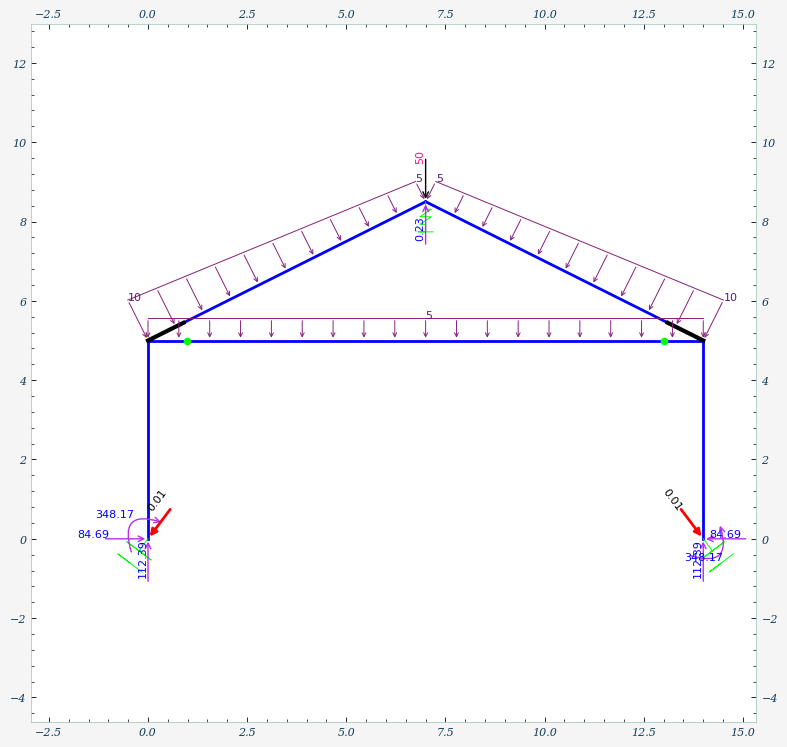

In [16]:

model_viewer(model)

In [22]:
import sympy as sp

# Definición de símbolos
a, b, L, phi = sp.symbols('a b L phi')

# Vector q_phi (extendido a 6x1 con dos ceros al final)
q_phi = sp.Matrix([
    0,
    b*L/2 + a*L**2/60 * ( (10*phi + 9)/(phi+1) ),
    b*L**2/12 + a*L**3/120 * ( (5*phi + 4)/(phi+1) ),
    0,
    b*L/2 + a*L**2/60 * ( (20*phi + 21)/(phi+1) ),
    -b*L**2/12 - a*L**3/120 * ( (5*phi + 6)/(phi+1) ),
])

# Matriz H.T
HT = sp.Matrix([
    [1, 0, 0, 0, 0, 0],
    [0, 1, a, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, -b],
    [0, 0, 0, 0, 0, 1]
])

# Producto H.T @ q_phi
result = HT * q_phi

# Mostrar resultado simplificado
result.simplify()
sp.factor(result)
result




Matrix([
[                                                                                                0],
[ L*(2*L*a*(10*phi + 9) + L*a*(L*a*(5*phi + 4) + 10*b*(phi + 1)) + 60*b*(phi + 1))/(120*(phi + 1))],
[                                          L**2*(L*a*(5*phi + 4) + 10*b*(phi + 1))/(120*(phi + 1))],
[                                                                                                0],
[L*(2*L*a*(20*phi + 21) + L*b*(L*a*(5*phi + 6) + 10*b*(phi + 1)) + 60*b*(phi + 1))/(120*(phi + 1))],
[                                         L**2*(-L*a*(5*phi + 6) - 10*b*(phi + 1))/(120*(phi + 1))]])